# PyCitySchools Analysis
    #Introduction
    The pyschools district is comprised of fifteen high schools that range from small charter schools with less than a thousand students to district schools with almost five thousand students. The total number is 39,170 students in these high schools. The total budget for the district is $24,649,428.00, or an average of $1,643,295 per school or an average of $629.29 per student. The data is for grades nine through twelve. No information about school debt is available. The district has an overall passing rate of 65.17%, this analysis will discuss factors related to student success.  

# District Summary

In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt

# File to Load 
school_data_to_load = Path("Resources/schools_complete.csv")
student_data_to_load = Path("Resources/students_complete.csv")

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
sch_data = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
sch_data.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


In [2]:
# School count

sc_cou = sch_data['school_name'].value_counts().count()

sc_cou
#check if counting the value count works

15

In [3]:
# total number of students
num_stu= sch_data['Student ID'].count()
#school_data_complete.count()
num_stu

39170

In [4]:
#Budget total
budget= sch_data['budget'].unique().sum()
budget

24649428

In [5]:
#District per Student Budget
Dis_p_stu_bud = budget/num_stu
Dis_p_stu_bud

629.2935409752362

In [6]:
# Average math score
mat_avg= sch_data['math_score'].mean()
#why is the nonunique option correct?
mat_avg

78.98537145774827

In [7]:
#average reading score
read_avg = sch_data['reading_score'].mean()
read_avg

81.87784018381414

In [8]:
# Use the following to calculate the percentage of students who passed math (math scores greather than or equal to 70)
passing_math_count = sch_data[(sch_data["math_score"] >= 70)].count()["student_name"]
passing_math_percentage = passing_math_count/ float(num_stu) * 100
passing_math_percentage

74.9808526933878

In [9]:
#percent passing reading
pas_read = sch_data[(sch_data['reading_score'] >=70)].count()['student_name']
pas_read_avg = pas_read/float(num_stu)*100
pas_read_avg

85.80546336482001

In [10]:
# Use the following to calculate the percentage of students that passed math and reading
passing_math_reading_count = sch_data[(sch_data["math_score"] >= 70) & (sch_data["reading_score"] >= 70)].count()["student_name"]
overall_passing_rate = passing_math_reading_count /  float(num_stu) * 100
overall_passing_rate

65.17232575950983

In [11]:
# Create a high-level snapshot of the district's key metrics in a DataFrame. Must have:
#Total Schools, Total Students, Total Budget, Average Math Score, Average Reading Score,
# % Passing Math, % Passing Reading, % Overall Passing

district_summary = [sc_cou, num_stu, budget, Dis_p_stu_bud, mat_avg, read_avg, passing_math_percentage,
                    pas_read_avg, overall_passing_rate]
district_summary = pd.DataFrame({'Total Schools':[sc_cou], 'Total Students':[num_stu], 
                                 'Total Budget':[budget], "Per Student Budget": [Dis_p_stu_bud],
                                 'Average Math Score': [mat_avg], "Average Reading Score": [read_avg], 
                                 'Passing Math Percent':[passing_math_percentage], '% Passing Reading':[pas_read_avg],
                                'Overall Passing Rate':[overall_passing_rate]})

# Formatting
district_summary["Total Students"] = district_summary["Total Students"].map("{:,}".format)
district_summary["Total Budget"] = district_summary["Total Budget"].map("${:,.2f}".format)

# Display the DataFrame
district_summary

,Total Schools,Total Students,Total Budget,Per Student Budget,Average Math Score,Average Reading Score,Passing Math Percent,% Passing Reading,Overall Passing Rate
0,15,"39,170","$24,649,428.00",629.293541,78.985371,81.87784,74.980853,85.805463,65.172326


# School Summary

    The school district has 8 charter schools and 7 district schools. The lowest performing school is Rodriguez High School,	with 52.99% of students achieving passing grades in both math and reading. The highest performing school is Cabrera High School, with 91.33% of students passing both math and reading. The highest scores for math are in Pena High School (average math score is 83.82%) and for reading (84.04%) at the same school. Interestingly Penna High School has a slightly lower overall passing rate than Cabrera High School.     
   . 

In [12]:
#Correct Index needs to match school with type
sch_typ = school_data.set_index('school_name')['type']
sch_typ

school_name
Huang High School        District
Figueroa High School     District
Shelton High School       Charter
Hernandez High School    District
Griffin High School       Charter
Wilson High School        Charter
Cabrera High School       Charter
Bailey High School       District
Holden High School        Charter
Pena High School          Charter
Wright High School        Charter
Rodriguez High School    District
Johnson High School      District
Ford High School         District
Thomas High School        Charter
Name: type, dtype: object

In [13]:
# calculate students per school
stu_per_sch = sch_data.groupby('school_name')['Student ID'].count()
stu_per_sch

school_name
Bailey High School       4976
Cabrera High School      1858
Figueroa High School     2949
Ford High School         2739
Griffin High School      1468
Hernandez High School    4635
Holden High School        427
Huang High School        2917
Johnson High School      4761
Pena High School          962
Rodriguez High School    3999
Shelton High School      1761
Thomas High School       1635
Wilson High School       2283
Wright High School       1800
Name: Student ID, dtype: int64

In [14]:
#per school budget
tot_bud= per_sch = sch_data.groupby('school_name')['budget'].mean()
tot_bud

school_name
Bailey High School       3124928.0
Cabrera High School      1081356.0
Figueroa High School     1884411.0
Ford High School         1763916.0
Griffin High School       917500.0
Hernandez High School    3022020.0
Holden High School        248087.0
Huang High School        1910635.0
Johnson High School      3094650.0
Pena High School          585858.0
Rodriguez High School    2547363.0
Shelton High School      1056600.0
Thomas High School       1043130.0
Wilson High School       1319574.0
Wright High School       1049400.0
Name: budget, dtype: float64

In [15]:
#Values check
school_data


,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500
5,5,Wilson High School,Charter,2283,1319574
6,6,Cabrera High School,Charter,1858,1081356
7,7,Bailey High School,District,4976,3124928
8,8,Holden High School,Charter,427,248087
9,9,Pena High School,Charter,962,585858


In [16]:
# Calculate the budget per student
per_stu = sch_data.groupby('school_name')['Student ID'].count()
tot_bud = sch_data.groupby('school_name')['budget'].mean()
per_stu_sch = per_sch/per_stu

per_stu_sch

school_name
Bailey High School       628.0
Cabrera High School      582.0
Figueroa High School     639.0
Ford High School         644.0
Griffin High School      625.0
Hernandez High School    652.0
Holden High School       581.0
Huang High School        655.0
Johnson High School      650.0
Pena High School         609.0
Rodriguez High School    637.0
Shelton High School      600.0
Thomas High School       638.0
Wilson High School       578.0
Wright High School       583.0
dtype: float64

In [17]:
#avg Math Score

sch_scor = sch_data.groupby('school_name')['math_score'].mean()
 
sch_scor

school_name
Bailey High School       77.048432
Cabrera High School      83.061895
Figueroa High School     76.711767
Ford High School         77.102592
Griffin High School      83.351499
Hernandez High School    77.289752
Holden High School       83.803279
Huang High School        76.629414
Johnson High School      77.072464
Pena High School         83.839917
Rodriguez High School    76.842711
Shelton High School      83.359455
Thomas High School       83.418349
Wilson High School       83.274201
Wright High School       83.682222
Name: math_score, dtype: float64

In [18]:
#avg reading Score

sch_Red_scor = sch_data.groupby('school_name')['reading_score'].mean()
 
sch_Red_scor

school_name
Bailey High School       81.033963
Cabrera High School      83.975780
Figueroa High School     81.158020
Ford High School         80.746258
Griffin High School      83.816757
Hernandez High School    80.934412
Holden High School       83.814988
Huang High School        81.182722
Johnson High School      80.966394
Pena High School         84.044699
Rodriguez High School    80.744686
Shelton High School      83.725724
Thomas High School       83.848930
Wilson High School       83.989488
Wright High School       83.955000
Name: reading_score, dtype: float64

In [19]:
#num stud passing math
num_math_pas = sch_data[(sch_data["math_score"] >= 70)]
stu_pas_mat = num_math_pas.groupby(['school_name']).size()
stu_pas_mat

school_name
Bailey High School       3318
Cabrera High School      1749
Figueroa High School     1946
Ford High School         1871
Griffin High School      1371
Hernandez High School    3094
Holden High School        395
Huang High School        1916
Johnson High School      3145
Pena High School          910
Rodriguez High School    2654
Shelton High School      1653
Thomas High School       1525
Wilson High School       2143
Wright High School       1680
dtype: int64

In [20]:
#num stud passing read
num_read_pas = sch_data[(sch_data["reading_score"] >= 70)]
stu_pas_read = num_read_pas.groupby(['school_name']).size()
stu_pas_read

school_name
Bailey High School       4077
Cabrera High School      1803
Figueroa High School     2381
Ford High School         2172
Griffin High School      1426
Hernandez High School    3748
Holden High School        411
Huang High School        2372
Johnson High School      3867
Pena High School          923
Rodriguez High School    3208
Shelton High School      1688
Thomas High School       1591
Wilson High School       2204
Wright High School       1739
dtype: int64

In [21]:
#calculate the number of students per school that passed both math and reading with scores of 70 or higher
students_passing_math_and_reading = sch_data[(sch_data["reading_score"] >= 70) & (sch_data["math_score"] >= 70)]
school_students_passing_math_and_reading = students_passing_math_and_reading.groupby(["school_name"]).size()
school_students_passing_math_and_reading

school_name
Bailey High School       2719
Cabrera High School      1697
Figueroa High School     1569
Ford High School         1487
Griffin High School      1330
Hernandez High School    2481
Holden High School        381
Huang High School        1561
Johnson High School      2549
Pena High School          871
Rodriguez High School    2119
Shelton High School      1583
Thomas High School       1487
Wilson High School       2068
Wright High School       1626
dtype: int64

In [22]:
# Use the provided code to calculate the passing rates
per_school_passing_math = stu_pas_mat / stu_per_sch * 100
per_school_passing_reading = stu_pas_read / stu_per_sch * 100
overall_passing_rate = school_students_passing_math_and_reading / stu_per_sch * 100
overall_passing_rate

school_name
Bailey High School       54.642283
Cabrera High School      91.334769
Figueroa High School     53.204476
Ford High School         54.289887
Griffin High School      90.599455
Hernandez High School    53.527508
Holden High School       89.227166
Huang High School        53.513884
Johnson High School      53.539172
Pena High School         90.540541
Rodriguez High School    52.988247
Shelton High School      89.892107
Thomas High School       90.948012
Wilson High School       90.582567
Wright High School       90.333333
dtype: float64

In [23]:
# Create a DataFrame called `per_school_summary` with columns for the calculations above.
per_school_summary = [sch_typ, stu_per_sch, tot_bud, per_stu_sch, sch_scor, sch_Red_scor, 
                      school_students_passing_math_and_reading, stu_pas_mat, stu_pas_read, 
                      per_school_passing_math, per_school_passing_reading, overall_passing_rate]
per_school_summary =pd.DataFrame({"School Type": sch_typ, "Students per School": stu_per_sch, 
                "Per Student Budget": per_stu_sch, "Total School Budget": tot_bud, "Avg Math scores": sch_scor,
                                  "Avg Reading Score": sch_Red_scor, 
                "Combined Math and Reading Passing": school_students_passing_math_and_reading,
                "Number Passing Math": stu_pas_mat, "Number passing reading": stu_pas_read, 
                "% Passing Math": per_school_passing_math,
                "% Passing Reading": per_school_passing_reading, "% Passing Overall": overall_passing_rate})



# Formatting
per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)

# Display the DataFrame
per_school_summary

,School Type,Students per School,Per Student Budget,Total School Budget,Avg Math scores,Avg Reading Score,Combined Math and Reading Passing,Number Passing Math,Number passing reading,% Passing Math,% Passing Reading,% Passing Overall
school_name,,,,,,,,,,,,
Bailey High School,District,4976,$628.00,"$3,124,928.00",77.048432,81.033963,2719,3318,4077,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,$582.00,"$1,081,356.00",83.061895,83.975780,1697,1749,1803,94.133477,97.039828,91.334769
Figueroa High School,District,2949,$639.00,"$1,884,411.00",76.711767,81.158020,1569,1946,2381,65.988471,80.739234,53.204476
Ford High School,District,2739,$644.00,"$1,763,916.00",77.102592,80.746258,1487,1871,2172,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,$625.00,"$917,500.00",83.351499,83.816757,1330,1371,1426,93.392371,97.138965,90.599455
Hernandez High School,District,4635,$652.00,"$3,022,020.00",77.289752,80.934412,2481,3094,3748,66.752967,80.862999,53.527508
Holden High School,Charter,427,$581.00,"$248,087.00",83.803279,83.814988,381,395,411,92.505855,96.252927,89.227166
Huang High School,District,2917,$655.00,"$1,910,635.00",76.629414,81.182722,1561,1916,2372,65.683922,81.316421,53.513884
Johnson High School,District,4761,$650.00,"$3,094,650.00",77.072464,80.966394,2549,3145,3867,66.057551,81.222432,53.539172


In [24]:
per_school_summary.describe()

,Students per School,Avg Math scores,Avg Reading Score,Combined Math and Reading Passing,Number Passing Math,Number passing reading,% Passing Math,% Passing Reading,% Passing Overall
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2611.333333,80.432530,82.529188,1701.866667,1958.000000,2240.666667,80.987054,89.219023,73.277560
std,1420.915282,3.374548,1.519329,620.503927,817.858877,1075.247657,13.998824,8.180664,18.992148
min,427.000000,76.629414,80.744686,381.000000,395.000000,411.000000,65.683922,79.299014,52.988247
25%,1698.000000,77.060448,81.000178,1487.000000,1589.000000,1639.500000,66.523328,81.042716,53.533340
50%,2283.000000,83.061895,83.725724,1583.000000,1871.000000,2172.000000,92.505855,95.854628,89.227166
75%,3474.000000,83.388902,83.901965,2093.500000,2398.500000,2794.500000,93.629746,96.575376,90.561554
max,4976.000000,83.839917,84.044699,2719.000000,3318.000000,4077.000000,94.594595,97.308869,91.334769


# Highest Performing Schools (By Overall % Passing)
    Below is the summary data for the top five schools. They are all charter schools, with an average of 1,640 students per school. The average spending per student is $606.40.  The average percentage of students passing rate is 90.8%. The average percentage of students passing reading is 96.79% of students, and the percentage of students passing math in these schools is 93.85%. 

In [25]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
stu_pas_mat_and_read = per_school_summary.sort_values("% Passing Overall", ascending = False)
stu_pas_mat_and_read.head()

,School Type,Students per School,Per Student Budget,Total School Budget,Avg Math scores,Avg Reading Score,Combined Math and Reading Passing,Number Passing Math,Number passing reading,% Passing Math,% Passing Reading,% Passing Overall
school_name,,,,,,,,,,,,
Cabrera High School,Charter,1858,$582.00,"$1,081,356.00",83.061895,83.975780,1697,1749,1803,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,$638.00,"$1,043,130.00",83.418349,83.848930,1487,1525,1591,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,$625.00,"$917,500.00",83.351499,83.816757,1330,1371,1426,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,$578.00,"$1,319,574.00",83.274201,83.989488,2068,2143,2204,93.867718,96.539641,90.582567
Pena High School,Charter,962,$609.00,"$585,858.00",83.839917,84.044699,871,910,923,94.594595,95.945946,90.540541


In [26]:
#Save results as dataframe
top_schools = pd.DataFrame(stu_pas_mat_and_read)
top_schools

,School Type,Students per School,Per Student Budget,Total School Budget,Avg Math scores,Avg Reading Score,Combined Math and Reading Passing,Number Passing Math,Number passing reading,% Passing Math,% Passing Reading,% Passing Overall
school_name,,,,,,,,,,,,
Cabrera High School,Charter,1858,$582.00,"$1,081,356.00",83.061895,83.975780,1697,1749,1803,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,$638.00,"$1,043,130.00",83.418349,83.848930,1487,1525,1591,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,$625.00,"$917,500.00",83.351499,83.816757,1330,1371,1426,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,$578.00,"$1,319,574.00",83.274201,83.989488,2068,2143,2204,93.867718,96.539641,90.582567
Pena High School,Charter,962,$609.00,"$585,858.00",83.839917,84.044699,871,910,923,94.594595,95.945946,90.540541
Wright High School,Charter,1800,$583.00,"$1,049,400.00",83.682222,83.955000,1626,1680,1739,93.333333,96.611111,90.333333
Shelton High School,Charter,1761,$600.00,"$1,056,600.00",83.359455,83.725724,1583,1653,1688,93.867121,95.854628,89.892107
Holden High School,Charter,427,$581.00,"$248,087.00",83.803279,83.814988,381,395,411,92.505855,96.252927,89.227166
Bailey High School,District,4976,$628.00,"$3,124,928.00",77.048432,81.033963,2719,3318,4077,66.680064,81.933280,54.642283


# Bottom Performing Schools (By Overall % Passing)
    Below is the summary data for the bottom five schools. They are all district schools, with an average of 3,852.2 students per school. The average spending per student is $646.60.  The average percent of students passing rate is 53.35%. The average for percentage of students passing reading is 80.87% of students, however, the percent of students passing math in these school is 53.35%. The math and overall passing rates are identical, this indicates that the math instruction is a likely related to the overall rate of student failure. 

In [27]:
# # Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
stu_fail_mat_and_read = per_school_summary.sort_values("% Passing Overall", ascending = True)
stu_fail_mat_and_read.head()

,School Type,Students per School,Per Student Budget,Total School Budget,Avg Math scores,Avg Reading Score,Combined Math and Reading Passing,Number Passing Math,Number passing reading,% Passing Math,% Passing Reading,% Passing Overall
school_name,,,,,,,,,,,,
Rodriguez High School,District,3999,$637.00,"$2,547,363.00",76.842711,80.744686,2119,2654,3208,66.366592,80.220055,52.988247
Figueroa High School,District,2949,$639.00,"$1,884,411.00",76.711767,81.158020,1569,1946,2381,65.988471,80.739234,53.204476
Huang High School,District,2917,$655.00,"$1,910,635.00",76.629414,81.182722,1561,1916,2372,65.683922,81.316421,53.513884
Hernandez High School,District,4635,$652.00,"$3,022,020.00",77.289752,80.934412,2481,3094,3748,66.752967,80.862999,53.527508
Johnson High School,District,4761,$650.00,"$3,094,650.00",77.072464,80.966394,2549,3145,3867,66.057551,81.222432,53.539172


In [28]:
#Save results as Dataframe
bottom_schools= pd.DataFrame(stu_fail_mat_and_read)
bottom_schools

,School Type,Students per School,Per Student Budget,Total School Budget,Avg Math scores,Avg Reading Score,Combined Math and Reading Passing,Number Passing Math,Number passing reading,% Passing Math,% Passing Reading,% Passing Overall
school_name,,,,,,,,,,,,
Rodriguez High School,District,3999,$637.00,"$2,547,363.00",76.842711,80.744686,2119,2654,3208,66.366592,80.220055,52.988247
Figueroa High School,District,2949,$639.00,"$1,884,411.00",76.711767,81.158020,1569,1946,2381,65.988471,80.739234,53.204476
Huang High School,District,2917,$655.00,"$1,910,635.00",76.629414,81.182722,1561,1916,2372,65.683922,81.316421,53.513884
Hernandez High School,District,4635,$652.00,"$3,022,020.00",77.289752,80.934412,2481,3094,3748,66.752967,80.862999,53.527508
Johnson High School,District,4761,$650.00,"$3,094,650.00",77.072464,80.966394,2549,3145,3867,66.057551,81.222432,53.539172
Ford High School,District,2739,$644.00,"$1,763,916.00",77.102592,80.746258,1487,1871,2172,68.309602,79.299014,54.289887
Bailey High School,District,4976,$628.00,"$3,124,928.00",77.048432,81.033963,2719,3318,4077,66.680064,81.933280,54.642283
Holden High School,Charter,427,$581.00,"$248,087.00",83.803279,83.814988,381,395,411,92.505855,96.252927,89.227166
Shelton High School,Charter,1761,$600.00,"$1,056,600.00",83.359455,83.725724,1583,1653,1688,93.867121,95.854628,89.892107


# Math Scores by Grade
 
    Below is a table of student math performance by grade level. Analysis of student performance by grade level indicates that the difference in performance starts in the ninth grade. The graph below shows scores for schools graphed out. The graph shows that there is a difference at the 9th grade level (no data from before students started at this school). The graph shows two clusters of lines, one around 77% passing (the district schools) and the other at around 81% passing (the charter schools).  

In [29]:
#   separate the data by grade
ninth_graders = sch_data[(sch_data["grade"] == "9th")]
tenth_graders = sch_data[(sch_data["grade"] == "10th")]
eleventh_graders = sch_data[(sch_data["grade"] == "11th")]
twelfth_graders = sch_data[(sch_data["grade"] == "12th")]

# Group by `school_name` and take the mean of the `math_score` column for each.
ninth_grade_scores = ninth_graders.groupby('school_name')['math_score'].mean()
tenth_grade_scores = tenth_graders.groupby('school_name')['math_score'].mean()
eleventh_grade_scores = eleventh_graders.groupby('school_name')['math_score'].mean()
twelfth_grade_scores = twelfth_graders.groupby('school_name')['math_score'].mean()

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
math_scores_by_grade = pd.DataFrame({"Nith Grade Math Scores": ninth_grade_scores, 
                                    "Tenth Grade Math Scores": tenth_grade_scores,
                                   "Eleventh Grade Manth Scores": eleventh_grade_scores, 
                                    "Twelfth Grade Math Scores": twelfth_grade_scores})

# Removes index
math_scores_by_grade.index.name = None

# Display the DataFrame
math_scores_by_grade

,Nith Grade Math Scores,Tenth Grade Math Scores,Eleventh Grade Manth Scores,Twelfth Grade Math Scores
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248
Pena High School,83.625455,83.372000,84.328125,84.121547


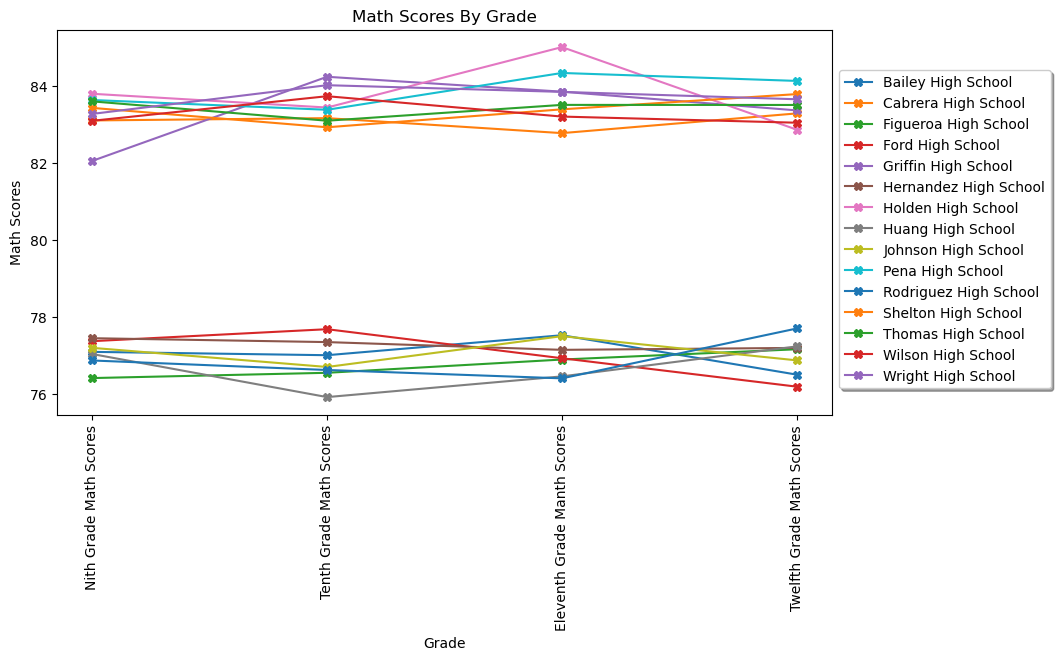

In [30]:
r = math_scores_by_grade
plt.figure(figsize = (10,5))
plt.plot(r.T, marker = 'X')
plt.title('Math Scores By Grade')
plt.xlabel('Grade')
plt.ylabel('Math Scores')
plt.xticks(rotation = 90)
plt.legend(r.T, loc='lower left', bbox_to_anchor=(1, 0.05),
          ncol=1, fancybox=True, shadow=True)
plt.show()

# Reading Scores By Grade
    Below is a table of student reading performance by grade level. Analysis of student performance by grade level indicates that the difference in performance starts in the ninth grade. The graph below shows scores for schools graphed out. The graph shows that there is a difference at the 9th grade level (no data from before students started at this school). The graph shows two clusters of lines, one around 81% passing (the district schools) and the other at around 84% passing (the charter schools). Although Shelton high school seems to be an outlier in this. 

In [31]:
##   separate the data by grade
ninth_graders = sch_data[(sch_data["grade"] == "9th")]
tenth_graders = sch_data[(sch_data["grade"] == "10th")]
eleventh_graders = sch_data[(sch_data["grade"] == "11th")]
twelfth_graders = sch_data[(sch_data["grade"] == "12th")]

# Group by `school_name` and take the mean of the `math_score` column for each.
ninth_grade_math_scores = ninth_graders.groupby('school_name')['reading_score'].mean()
tenth_grade_math_scores = tenth_graders.groupby('school_name')['reading_score'].mean()
eleventh_grade_math_scores = eleventh_graders.groupby('school_name')['reading_score'].mean()
twelfth_grade_math_scores = twelfth_graders.groupby('school_name')['reading_score'].mean()

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
Read_scores_by_grade = pd.DataFrame({"Nith Grade Math Scores": ninth_grade_math_scores, 
                                    "Tenth Grade Math Scores": tenth_grade_math_scores,
                                   "Eleventh Grade Manth Scores": eleventh_grade_math_scores, 
                                    "Twelfth Grade Math Scores": twelfth_grade_math_scores})

# Minor data wrangling
Read_scores_by_grade.index.name = None

# Display the DataFrame
Read_scores_by_grade

,Nith Grade Math Scores,Tenth Grade Math Scores,Eleventh Grade Manth Scores,Twelfth Grade Math Scores
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564
Pena High School,83.807273,83.612000,84.335938,84.591160


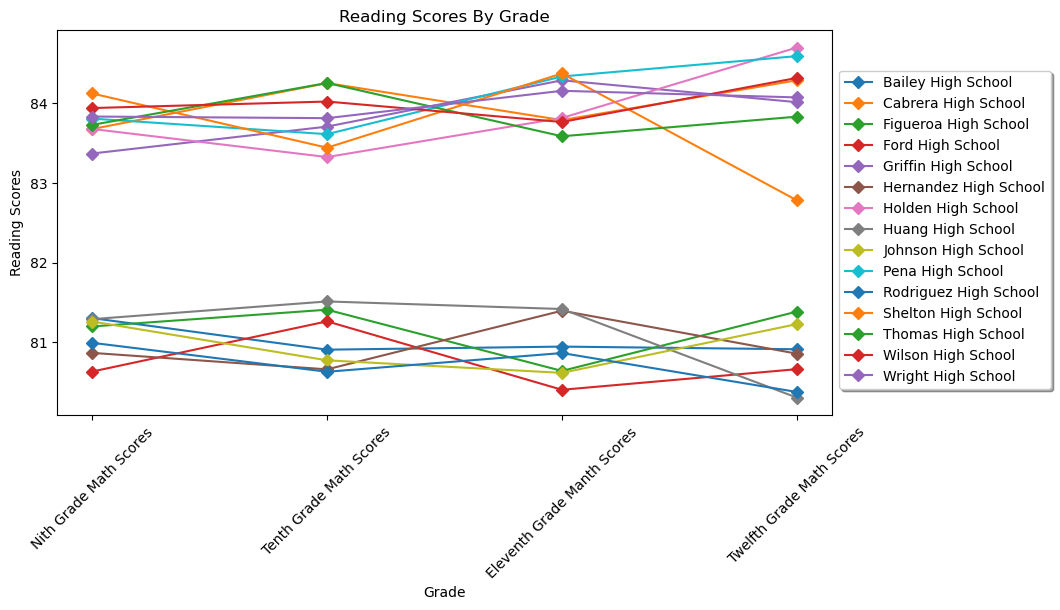

In [32]:
q= Read_scores_by_grade
plt.figure(figsize = (10,5))
plt.plot(q.T, marker = 'D')
plt.title('Reading Scores By Grade')
plt.xlabel('Grade')
plt.ylabel('Reading Scores')
plt.xticks(rotation=45)
plt.legend(r.T, loc='lower left', bbox_to_anchor=(1, 0.05),
          ncol=1, fancybox=True, shadow=True)
plt.show()

# Scores By School Spending
    Below is a breakdown of student performance, by total school spending. There is no information on the level of school debt (that would reduce real spending per student) so all numbers are the total spending per student on all costs. The Graph seems to show lower overall passing rates with increased school spending.
    The spending group under $585 has the best results in math passing, reading passing and overall passing. This is seen in both the absolute numbers and more dramatically in the percentage passing.

In [33]:
# Establish the bins 
spen_bins = [0, 585, 630, 645, 680]
Slabels = ["<$585", "$585-630", "$630-645", "$645-680"]

In [34]:
scho_spend = per_school_summary.copy() #makes copy of df 
scho_spend = scho_spend["Per Student Budget"].str[1:] #removes $, so I can use as number
scho_spend

school_name
Bailey High School       628.00
Cabrera High School      582.00
Figueroa High School     639.00
Ford High School         644.00
Griffin High School      625.00
Hernandez High School    652.00
Holden High School       581.00
Huang High School        655.00
Johnson High School      650.00
Pena High School         609.00
Rodriguez High School    637.00
Shelton High School      600.00
Thomas High School       638.00
Wilson High School       578.00
Wright High School       583.00
Name: Per Student Budget, dtype: object

In [35]:
scho_spend = per_school_summary.copy() #makes copy of df 
scho_spend["Spending Catagory"] = pd.cut(per_school_summary["Per Student Budget"].str[1:].astype(float), spen_bins, labels= Slabels, include_lowest = True)
scho_spend

,School Type,Students per School,Per Student Budget,Total School Budget,Avg Math scores,Avg Reading Score,Combined Math and Reading Passing,Number Passing Math,Number passing reading,% Passing Math,% Passing Reading,% Passing Overall,Spending Catagory
school_name,,,,,,,,,,,,,
Bailey High School,District,4976,$628.00,"$3,124,928.00",77.048432,81.033963,2719,3318,4077,66.680064,81.933280,54.642283,$585-630
Cabrera High School,Charter,1858,$582.00,"$1,081,356.00",83.061895,83.975780,1697,1749,1803,94.133477,97.039828,91.334769,<$585
Figueroa High School,District,2949,$639.00,"$1,884,411.00",76.711767,81.158020,1569,1946,2381,65.988471,80.739234,53.204476,$630-645
Ford High School,District,2739,$644.00,"$1,763,916.00",77.102592,80.746258,1487,1871,2172,68.309602,79.299014,54.289887,$630-645
Griffin High School,Charter,1468,$625.00,"$917,500.00",83.351499,83.816757,1330,1371,1426,93.392371,97.138965,90.599455,$585-630
Hernandez High School,District,4635,$652.00,"$3,022,020.00",77.289752,80.934412,2481,3094,3748,66.752967,80.862999,53.527508,$645-680
Holden High School,Charter,427,$581.00,"$248,087.00",83.803279,83.814988,381,395,411,92.505855,96.252927,89.227166,<$585
Huang High School,District,2917,$655.00,"$1,910,635.00",76.629414,81.182722,1561,1916,2372,65.683922,81.316421,53.513884,$645-680
Johnson High School,District,4761,$650.00,"$3,094,650.00",77.072464,80.966394,2549,3145,3867,66.057551,81.222432,53.539172,$645-680


In [36]:
#  Calculate averages for the desired columns. 
spen_ma_sc = scho_spend.groupby(["Spending Catagory"])["Avg Math scores"].mean()
spen_re_sc = scho_spend.groupby(["Spending Catagory"])["Avg Reading Score"].mean()
spen_p_m = scho_spend.groupby(["Spending Catagory"])["% Passing Math"].mean()
spen_p_re = scho_spend.groupby(["Spending Catagory"])["% Passing Reading"].mean()
all_ping_s = scho_spend.groupby(["Spending Catagory"])["% Passing Overall"].mean()

In [37]:
# Assemble into DataFrame
spending_summary = [spen_ma_sc, spen_re_sc, spen_p_m, spen_p_re, all_ping_s]
spending_summary_df = pd.DataFrame({"Math Scores (Average)": spen_ma_sc, "Reading Scores (Average)": spen_re_sc,
                                 "Percentage Passing Math": spen_p_m, "Percentage Passing Reading": spen_p_re,
                                 "Overall Passing Rate": all_ping_s})

# Display results
spending_summary_df

,Math Scores (Average),Reading Scores (Average),Percentage Passing Math,Percentage Passing Reading,Overall Passing Rate
Spending Catagory,,,,,
<$585,83.455399,83.933814,93.460096,96.610877,90.369459
$585-630,81.899826,83.155286,87.133538,92.718205,81.418596
$630-645,78.518855,81.624473,73.484209,84.391793,62.857656
$645-680,76.997210,81.027843,66.164813,81.133951,53.526855


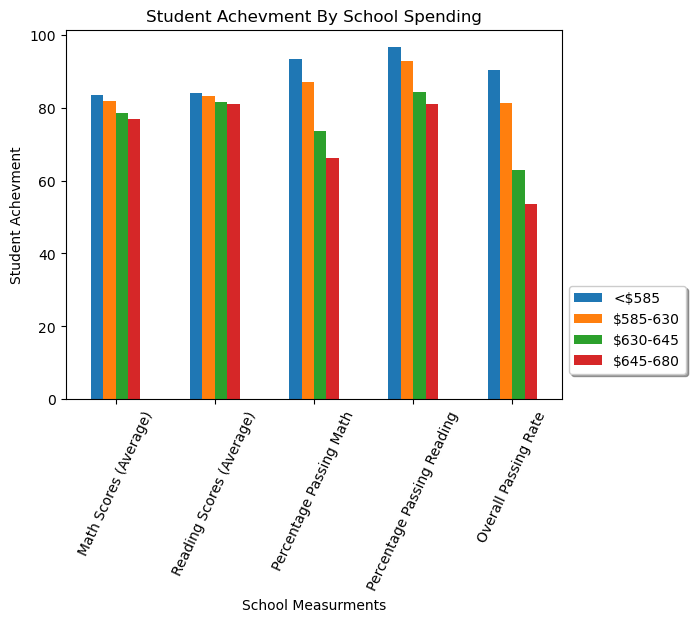

In [48]:
c = spending_summary_df
c.T.plot.bar()
#place key out of frame, to better see bars
##place key out of frame, to better see bars
plt.legend(c.T, loc='lower left', bbox_to_anchor=(1, 0.05),
          ncol=1, fancybox=True, shadow=True)
plt.title('Student Achevment By School Spending')
plt.xlabel('School Measurments')
plt.ylabel('Student Achevment')
plt.xticks(rotation=65)
plt.show()

# Scores By School Size
    The below has a breakdown of school performance by size. The summary percentages here are rounded.
    The graph below shows that the small and mediums size schools have fairly similar performance. The average reading scores are about 83%, the average math scores are about the same. The percentages of students in the small and medium schools passing math is about 93% and 96% for reading. The overall passing rate is about 90% in both these size ranges.
    However, the large schools seem to have slightly worse total numbers, but much worse percentages. For the average math score it is 77.7% and the average reading score is about 81%, the percentages for students passing are 69.96% for math and 82.77% for reading. The overall passing rate is around 58%. It may be that there is a benefit to having teachers with more time for each student.

In [49]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
Szlabels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [50]:
Sch_Scor_Size = per_school_summary.copy()
Sch_Scor_Size["School By Size"] = pd.cut(per_school_summary['Students per School'], size_bins, labels=Szlabels, include_lowest=True)
Sch_Scor_Size

,School Type,Students per School,Per Student Budget,Total School Budget,Avg Math scores,Avg Reading Score,Combined Math and Reading Passing,Number Passing Math,Number passing reading,% Passing Math,% Passing Reading,% Passing Overall,School By Size
school_name,,,,,,,,,,,,,
Bailey High School,District,4976,$628.00,"$3,124,928.00",77.048432,81.033963,2719,3318,4077,66.680064,81.933280,54.642283,Large (2000-5000)
Cabrera High School,Charter,1858,$582.00,"$1,081,356.00",83.061895,83.975780,1697,1749,1803,94.133477,97.039828,91.334769,Medium (1000-2000)
Figueroa High School,District,2949,$639.00,"$1,884,411.00",76.711767,81.158020,1569,1946,2381,65.988471,80.739234,53.204476,Large (2000-5000)
Ford High School,District,2739,$644.00,"$1,763,916.00",77.102592,80.746258,1487,1871,2172,68.309602,79.299014,54.289887,Large (2000-5000)
Griffin High School,Charter,1468,$625.00,"$917,500.00",83.351499,83.816757,1330,1371,1426,93.392371,97.138965,90.599455,Medium (1000-2000)
Hernandez High School,District,4635,$652.00,"$3,022,020.00",77.289752,80.934412,2481,3094,3748,66.752967,80.862999,53.527508,Large (2000-5000)
Holden High School,Charter,427,$581.00,"$248,087.00",83.803279,83.814988,381,395,411,92.505855,96.252927,89.227166,Small (<1000)
Huang High School,District,2917,$655.00,"$1,910,635.00",76.629414,81.182722,1561,1916,2372,65.683922,81.316421,53.513884,Large (2000-5000)
Johnson High School,District,4761,$650.00,"$3,094,650.00",77.072464,80.966394,2549,3145,3867,66.057551,81.222432,53.539172,Large (2000-5000)


In [51]:
#  Calculate averages for the desired columns. 
siz_ma_sc = Sch_Scor_Size.groupby(["School By Size"])["Avg Math scores"].mean()
siz_re_sc = Sch_Scor_Size.groupby(["School By Size"])["Avg Reading Score"].mean()
siz_p_m = Sch_Scor_Size.groupby(["School By Size"])["% Passing Math"].mean()
siz_p_re = Sch_Scor_Size.groupby(["School By Size"])["% Passing Reading"].mean()
all_siz = Sch_Scor_Size.groupby(["School By Size"])["% Passing Overall"].mean()

In [52]:
# Create a DataFrame called `size_summary` that breaks down school performance based on school size (small, medium, or large).
# Use the scores above to create a new DataFrame called `size_summary`
size_summary = [siz_ma_sc, siz_re_sc, siz_p_m, all_siz]
size_summary = pd.DataFrame({'Avg Math score': siz_ma_sc, "Average Reading Score": siz_re_sc, "Percent Passing Math":siz_p_m,
                            "% Passing Reading": siz_p_re, "Overall Passing Rate": all_siz})
# Display results
size_summary

,Avg Math score,Average Reading Score,Percent Passing Math,% Passing Reading,Overall Passing Rate
School By Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


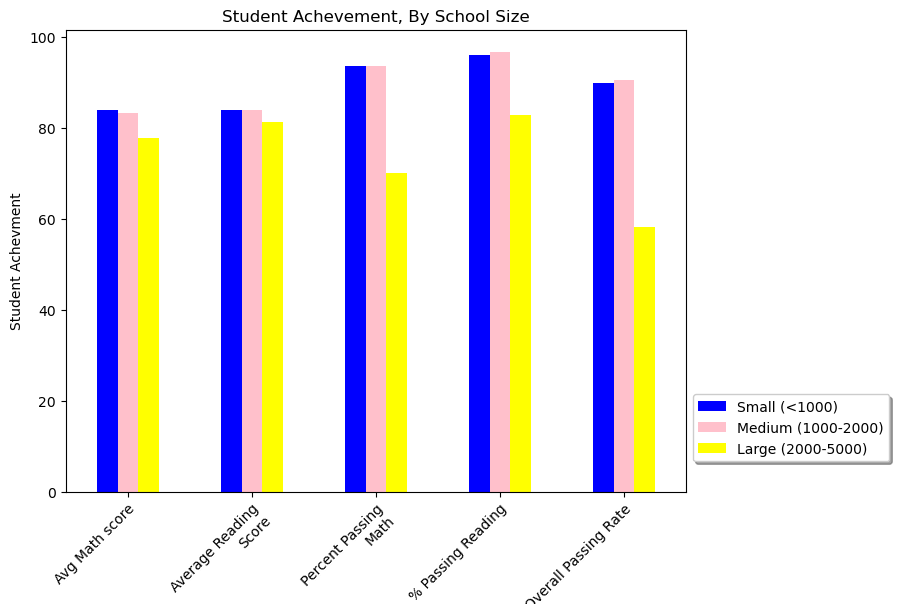

In [57]:
v = size_summary
# Configure plot, figsize, title, and axis labels
figure1 = v.T.plot(kind="bar", color=["blue", "pink", "yellow"], figsize=(8,6),
                                   title="Student Achevement, By School Size",
                                   xlabel="School Size",
                                   ylabel="Student Achevment")

# Configure x-tick rotation
xticklabels = v.T.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

#place key out of frame, to better see bars
plt.legend(v.T, loc='lower left', bbox_to_anchor=(1, 0.05),
          ncol=1, fancybox=True, shadow=True)

# Show plot
plt.show()

# Scores By School Type
    Below is the breakdown of student performance by district or charter school. There are higher scores for math in the charter schools (83% vs 80%), reading (83% vs 81%). The percentages of students passing are higher in the charter schools (Math 93.6% vs 66.5%, reading 96.6% vs 80.8%, and overall 90% vs 53.7%). The bar graph below shows the difference clearly.

In [58]:
#  Calculate averages for the desired columns. 
typ_ma_sc = per_school_summary.groupby(["School Type"])["Avg Math scores"].mean()
typ_re_sc = per_school_summary.groupby(["School Type"])["Avg Reading Score"].mean()
typ_p_m = per_school_summary.groupby(["School Type"])["% Passing Math"].mean()
typ_p_re = per_school_summary.groupby(["School Type"])["% Passing Reading"].mean()
all_typ = per_school_summary.groupby(["School Type"])["% Passing Overall"].mean()

In [59]:
# Create a DataFrame called `type_summary` that breaks down school performance based on school type.
# Use the scores above to create a new DataFrame called `type_summary`
type_summary = [typ_ma_sc, typ_re_sc, typ_p_m, all_typ]
type_summary = pd.DataFrame({'Avg Math score': typ_ma_sc, "Average Reading Score": typ_re_sc, "Percent Passing Math":typ_p_m,
                            "% Passing Reading": typ_p_re, "Overall Passing Rate": all_typ})
# Display results
type_summary

,Avg Math score,Average Reading Score,Percent Passing Math,% Passing Reading,Overall Passing Rate
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208


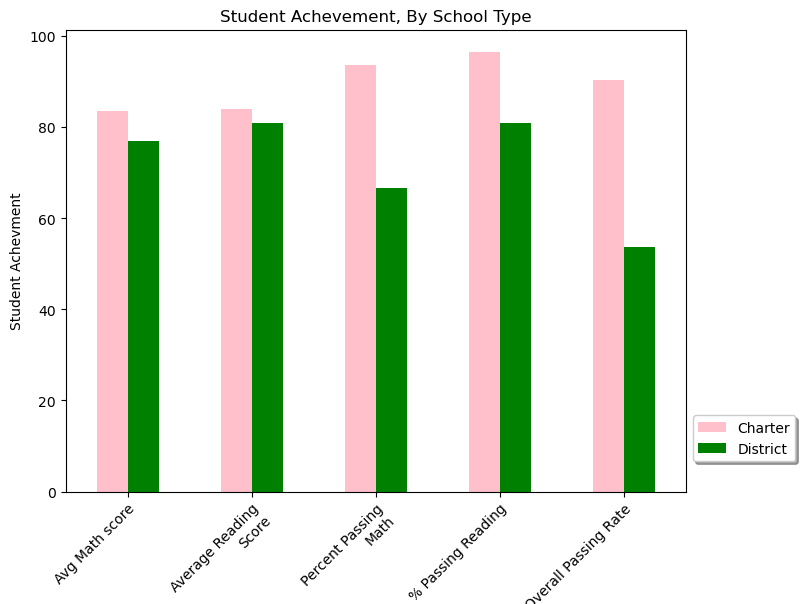

In [62]:
z = type_summary
# Configure plot, figsize, title, and axis labels
figure1 = z.T.plot(kind="bar", color=["pink", "green"], figsize=(8,6),
                                   title="Student Achevement, By School Type",
                                   xlabel="School Type",
                                   ylabel="Student Achevment")

# Configure x-tick rotation
xticklabels = z.T.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

#place key out of frame, to better see bars
plt.legend(z.T, loc='lower left', bbox_to_anchor=(1, 0.05),
          ncol=1, fancybox=True, shadow=True)

# Show plot
plt.show()

# Conclusion 

    The district has schools that have differences in several areas. The most important differences seem to be found in if the school was a charter school or not (with higher overall student passing rates as well are higher individual, math and reading scores). Thew other important difference between schools in the district is in the amount of money spent per student. There needs to be further analysis to determine why the schools with lower per student spending had better results in math education (measured by percentage of students passing) and in overall student passing rate. There also seems to be some effect in the size of the school. This may be because smaller schools have an easier time helping struggling students. 